In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#获取数据
data = pd.read_csv("ex1data2.txt",names=('area','room_num','price')) #获取数据

In [3]:
# 将数据标准化
data = np.array(data)
mean = data.mean(axis=0)
deviation = data.std(axis=0)
data_standardize = (data-mean)/deviation
mean,deviation,data_standardize

(array([2.00068085e+03, 3.17021277e+00, 3.40412660e+05]),
 array([7.86202619e+02, 7.52842809e-01, 1.23702536e+05]),
 array([[ 1.31415422e-01, -2.26093368e-01,  4.80890225e-01],
        [-5.09640698e-01, -2.26093368e-01, -8.49833796e-02],
        [ 5.07908699e-01, -2.26093368e-01,  2.31097448e-01],
        [-7.43677059e-01, -1.55439190e+00, -8.76398036e-01],
        [ 1.27107075e+00,  1.10220517e+00,  1.61263744e+00],
        [-1.99450507e-02,  1.10220517e+00, -3.27500639e-01],
        [-5.93588523e-01, -2.26093368e-01, -2.06242009e-01],
        [-7.29685755e-01, -2.26093368e-01, -1.14317510e+00],
        [-7.89466782e-01, -2.26093368e-01, -1.03807621e+00],
        [-6.44465993e-01, -2.26093368e-01, -7.91516995e-01],
        [-7.71822042e-02,  1.10220517e+00, -8.11734851e-01],
        [-8.65999486e-04, -2.26093368e-01,  5.32514582e-02],
        [-1.40779041e-01, -2.26093368e-01, -8.41830726e-02],
        [ 3.15099326e+00,  2.43050370e+00,  2.90606282e+00],
        [-9.31923697e-01, -2.2

In [4]:
#获取数据与标签
train_x = torch.Tensor(np.array(data_standardize[:,0:2]).reshape(-1,2))
train_y = torch.Tensor(np.array(data_standardize[:,2:]).reshape(-1,1))
train_x,train_y

(tensor([[ 1.3142e-01, -2.2609e-01],
         [-5.0964e-01, -2.2609e-01],
         [ 5.0791e-01, -2.2609e-01],
         [-7.4368e-01, -1.5544e+00],
         [ 1.2711e+00,  1.1022e+00],
         [-1.9945e-02,  1.1022e+00],
         [-5.9359e-01, -2.2609e-01],
         [-7.2969e-01, -2.2609e-01],
         [-7.8947e-01, -2.2609e-01],
         [-6.4447e-01, -2.2609e-01],
         [-7.7182e-02,  1.1022e+00],
         [-8.6600e-04, -2.2609e-01],
         [-1.4078e-01, -2.2609e-01],
         [ 3.1510e+00,  2.4305e+00],
         [-9.3192e-01, -2.2609e-01],
         [ 3.8072e-01,  1.1022e+00],
         [-8.6578e-01, -1.5544e+00],
         [-9.7263e-01, -2.2609e-01],
         [ 7.7374e-01,  1.1022e+00],
         [ 1.3105e+00,  1.1022e+00],
         [-2.9723e-01, -2.2609e-01],
         [-1.4332e-01, -1.5544e+00],
         [-5.0455e-01, -2.2609e-01],
         [-4.9200e-02,  1.1022e+00],
         [ 2.4031e+00, -2.2609e-01],
         [-1.1456e+00, -2.2609e-01],
         [-6.9026e-01, -2.2609e-01],
 

In [5]:
#构建模型
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = torch.nn.Linear(2,1)
    def forward(self,x):
        return self.linear(x)
net = LinearModel()

In [6]:
#构建损失函数和优化器
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(),lr=0.01)

In [7]:
#开始训练
for epoch in range(30000):
    y_pred = net(train_x)
    loss = criterion(y_pred,train_y)
    if epoch%1000==0:
        print(f'epoch={epoch},loss={loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch=0,loss=2.8541553020477295
epoch=1000,loss=0.2670549750328064
epoch=2000,loss=0.2670549750328064
epoch=3000,loss=0.2670549750328064
epoch=4000,loss=0.2670549750328064
epoch=5000,loss=0.2670549750328064
epoch=6000,loss=0.2670549750328064
epoch=7000,loss=0.2670549750328064
epoch=8000,loss=0.2670549750328064
epoch=9000,loss=0.2670549750328064
epoch=10000,loss=0.2670549750328064
epoch=11000,loss=0.2670549750328064
epoch=12000,loss=0.2670549750328064
epoch=13000,loss=0.2670549750328064
epoch=14000,loss=0.2670549750328064
epoch=15000,loss=0.2670549750328064
epoch=16000,loss=0.2670549750328064
epoch=17000,loss=0.2670549750328064
epoch=18000,loss=0.2670549750328064
epoch=19000,loss=0.2670549750328064
epoch=20000,loss=0.2670549750328064
epoch=21000,loss=0.2670549750328064
epoch=22000,loss=0.2670549750328064
epoch=23000,loss=0.2670549750328064
epoch=24000,loss=0.2670549750328064
epoch=25000,loss=0.2670549750328064
epoch=26000,loss=0.2670549750328064
epoch=27000,loss=0.2670549750328064
epoch

In [8]:
#获取权重和偏置值
w,b = net.linear.weight,net.linear.bias.item()
w1 = w[0,0].detach().numpy()
w2 = w[0,1].detach().numpy()
print(w1,w2,b)

0.8847638 -0.053177483 -1.0466284505739054e-09


In [83]:
def ww(data):
    data = (data-mean[:2])/deviation[:2]
    pred = w1*data[:,0]+w2*data[:,1]+b
    return pred*deviation[2]+mean[2]
ww([[2000,1]])

array([359280.76205958])

In [ ]:
x1 = np.arange(800,4500)
x2 = np.arange(0,6,(6/3700))
x3 = []
for i in range(800,4500,10):
    for j in np.arange(0,6,0.1):
        x3.append(ww([[i,j]]))

C:\Users\admin\AppData\Local\Temp/ipykernel_6124/3950917183.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


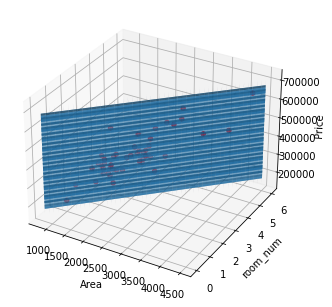

In [82]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x1,x2,np.array(x3).reshape(-1,1),alpha=0.6)
ax.scatter(data[:,0],data[:,1],np.array(data[:,2]).reshape(-1,1),marker='o',color='red')
ax.set_xlabel('Area')
ax.set_ylabel('room_num')
ax.set_zlabel('Price')
plt.show()